Train and test dataset for loan prediction is given
1. Load the dataset in Python environment
2. Perform different preprocessing steps
a. Missing value handling
b. Outlier detection
c. Encoding
d. Scaling


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
train_df = pd.read_csv('train_loan.csv')

In [8]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train_df.isna().sum()/len(train_df) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

a. Missing value handling

In [18]:
from sklearn.impute import SimpleImputer

In [20]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
columns_1 = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History']

In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_df[columns_1]=imputer.fit_transform(train_df[columns_1])

In [26]:
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train_df.isna().sum()/len(train_df) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

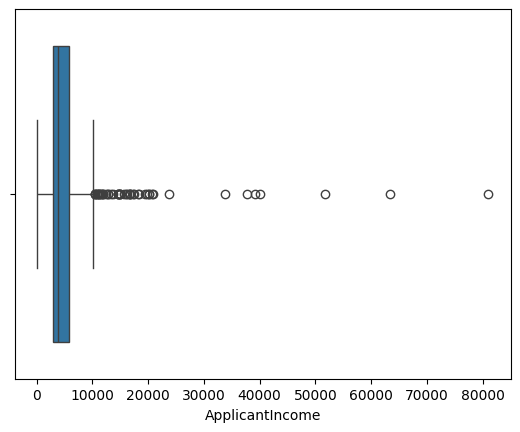

2917.5
10171.25
-1498.75


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
train_df = pd.read_csv('train_loan.csv')
train_df
train_df.info
train_df.describe()

train_df.isna().sum()
train_df.isna().sum()/len(train_df) *100
sns.boxplot(x=train_df['ApplicantIncome'])
plt.show()

q1 = train_df['ApplicantIncome'].quantile(0.25)
q3 = train_df['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr
print(upper_limit)
print(lower_limit)

b. Outlier detection

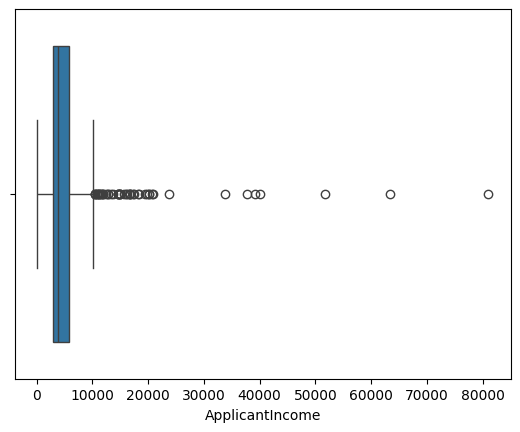

In [33]:
sns.boxplot(x=train_df['ApplicantIncome'])
plt.show()

In [35]:
q1 = train_df['ApplicantIncome'].quantile(0.25)
q3 = train_df['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

2917.5


In [37]:
lower_limit = q1 - 1.5 *iqr
upper_limit = q3 + 1.5 * iqr

In [39]:
print(upper_limit)
print(lower_limit)

10171.25
-1498.75


LoanAmountOutlier handling in Loan_Amount_Term

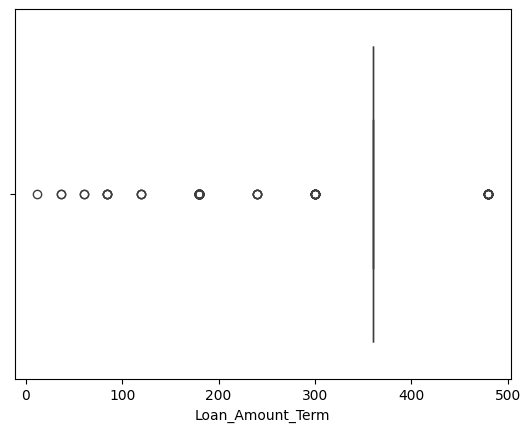

In [42]:
sns.boxplot(x=train_df['Loan_Amount_Term'])
plt.show()

In [44]:
q1 = train_df['Loan_Amount_Term'].quantile(0.25)
q3 = train_df['Loan_Amount_Term'].quantile(0.75)

iqr = q3 - q1
print(iqr)

0.0


In [45]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr

In [47]:
print(upper_limit)
print(lower_limit)

360.0
360.0


In [48]:
#Ignoring outliers in Loan_Amount_Term
#train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].apply(limit_imputer)

c. Encoding

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [52]:
data = pd.read_csv("train_loan.csv")

In [54]:
X = data.drop(columns=["Gender"])
y = data["Married"]

In [80]:
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv('train_loan.csv')

# Check the data types of each column
print(df.dtypes)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Check the encoded dataframe
print(df_encoded.head())

# Save the encoded dataset to a new CSV file
df_encoded.to_csv('encoded_dataset.csv', index=False)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_ID_LP001002  Loan_ID_LP001003  Loan_ID_LP001005  \
0             1.0                 1                 0                 0   
1             1.0               

d. Scaling


In [94]:
scaled_data = pd.DataFrame(data)
scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()

<ipython-input-94-9686aa7db28f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()
<ipython-input-94-9686aa7db28f>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()


In [96]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data

# Initialize scaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(X)

# Print original and scaled data
print("Original data:")
print(X[:5])
print("\nScaled data:")
print(scaled_data[:5])


Original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Scaled data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Train and test dataset for loan prediction is given
1. Load the dataset in Python environment
2. Perform different preprocessing steps
a. Missing value handling
b. Outlier detection
c. Encoding
d. Scaling

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
pd.set_option('display.max_columns', None)

In [104]:
test_df = pd.read_csv('test_loan.csv')

In [106]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [109]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [111]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [113]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [115]:
test_df.isna().sum()/len(test_df) *100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

a. Missing value handling

In [117]:
from sklearn.impute import SimpleImputer

In [119]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [121]:
columns_1 = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History']

In [123]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_df[columns_1]=imputer.fit_transform(test_df[columns_1])

In [125]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [127]:
test_df.isna().sum()/len(test_df) *100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       0.000000
Property_Area        0.000000
dtype: float64

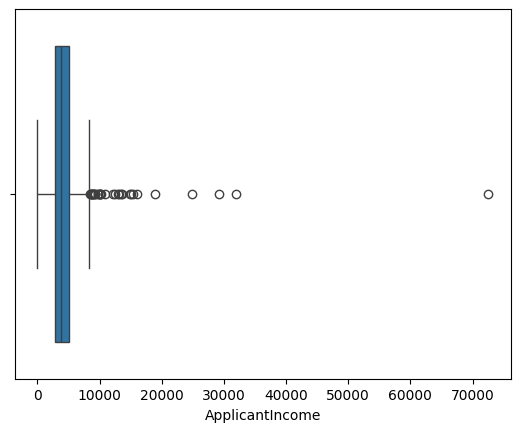

2196.0
8354.0
-430.0


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
test_df = pd.read_csv('test_loan.csv')
test_df
test_df.info
test_df.describe()

test_df.isna().sum()
test_df.isna().sum()/len(test_df) *100
sns.boxplot(x=test_df['ApplicantIncome'])
plt.show()

q1 = test_df['ApplicantIncome'].quantile(0.25)
q3 = test_df['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr
print(upper_limit)
print(lower_limit)

b. Outlier detection

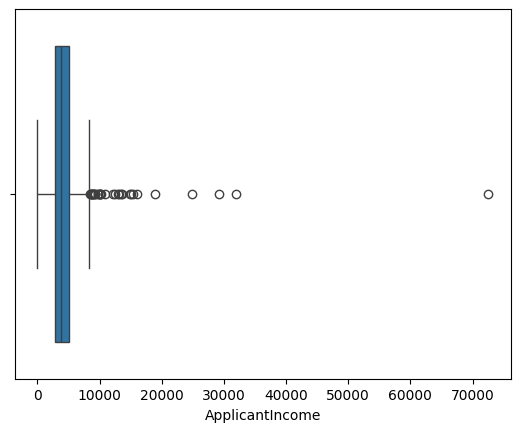

In [132]:
sns.boxplot(x=test_df['ApplicantIncome'])
plt.show()

In [135]:
q1 = test_df['ApplicantIncome'].quantile(0.25)
q3 = test_df['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

2196.0


In [137]:
lower_limit = q1 - 1.5 *iqr
upper_limit = q3 + 1.5 * iqr

In [139]:
print(upper_limit)
print(lower_limit)

8354.0
-430.0


LoanAmountOutlier handling in Loan_Amount_Term

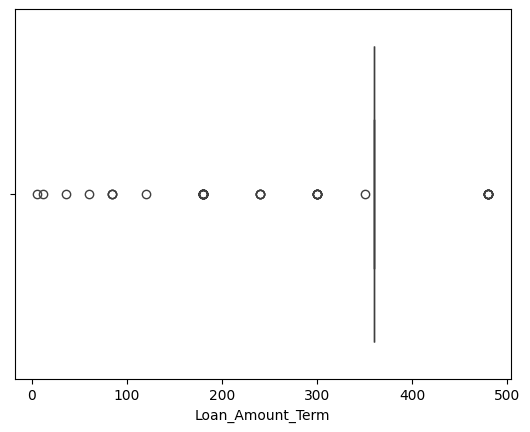

In [141]:
sns.boxplot(x=test_df['Loan_Amount_Term'])
plt.show()

In [143]:
q1 = test_df['Loan_Amount_Term'].quantile(0.25)
q3 = test_df['Loan_Amount_Term'].quantile(0.75)

iqr = q3 - q1
print(iqr)

0.0


In [145]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr

In [147]:
print(upper_limit)
print(lower_limit)

360.0
360.0


c. Encoding

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [171]:
data = pd.read_csv("test_loan.csv")

In [173]:
X = data.drop(columns=["Gender"])
y = data["Married"]

In [175]:
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv('test_loan.csv')

# Check the data types of each column
print(df.dtypes)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Check the encoded dataframe
print(df_encoded.head())

# Save the encoded dataset to a new CSV file
df_encoded.to_csv('encoded_dataset.csv', index=False)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  Loan_ID_LP001015  Loan_ID_LP001022  Loan_ID_LP001031  \
0             1.0                 1                 0                 0   
1             1.0                 0                 1        

d. Scaling

In [177]:
scaled_data = pd.DataFrame(data)
scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()

<ipython-input-177-9686aa7db28f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()
<ipython-input-177-9686aa7db28f>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()


In [178]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data

# Initialize scaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(X)

# Print original and scaled data
print("Original data:")
print(X[:5])
print("\nScaled data:")
print(scaled_data[:5])

Original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Scaled data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
